# Level 3 挑選一段功能修改

# 挑選功能: 繪製文字雲

In [27]:
import os
import pickle
import jieba
import operator
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from datetime import datetime
from collections import Counter

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

from modules import *

font_path = '../tools/msjh.ttc'
font = font_manager.FontProperties(fname='../tools/msjh.ttc',
                                   weight='bold',
                                   style='normal', size=16)

In [28]:
#開啟爬蟲好的新聞資料
with open('../crawler/data/new_talk.pkl', 'rb') as f: 
    data = pickle.load(f)
#將資料倒序    
data = data[::-1]
#data裡每一筆資料皆含有date, title, link, content
#此環節我們只需要用到content，故利用迴圈將每一筆資料的content存入另一個list中，命名為contents
contents = [news['content'] for news in data]

In [29]:
jieba.set_dictionary('../jieba_data/dict.txt.big') #jieba預設詞庫 
jieba.load_userdict('../jieba_data/userdict.txt') #使用者定義詞庫
stopwords = [] #停止詞詞庫(一些冗字)
#建立停止詞詞庫
with open('../jieba_data/stopwords.txt', 'r', encoding='UTF-8') as file:
    for each in file.readlines(): #依次讀取每行
        stopwords.append(each.strip()) #去掉每行頭尾空白，加入stopwords列表
    stopwords.append(' ')

Building prefix dict from C:\Users\smile\Documents\GitHub\Political-News-Analysis\jieba_data\dict.txt.big ...
Loading model from cache C:\Users\smile\AppData\Local\Temp\jieba.u53374e2250144ea5c4753748f623d3c6.cache
Loading model cost 1.417 seconds.
Prefix dict has been built succesfully.


# 修改文字雲的function
### 改變文字雲樣式: 
1. 為文字雲增加邊框
2. 如沒有提供背景圖片，colormap改成set1

In [50]:
def news_containing_keyword(keyword, news_list):
    """
    選取新聞內容中有出現關鍵字(keyword)的所有list
    """
    return list(filter(lambda news: keyword in news, news_list))

def get_wordcloud_of_keywords_modify(keywords, list_of_news, image_path=False):
    """
    利用新聞找出與keywords相關的字詞，並用這些字詞畫出文字雲
    """
    if type(keywords) == str:
        keywords = [keywords]
    
    if image_path:
        coloring = np.array(Image.open(os.path.join(image_path)))
        #color_func = ImageColorGenerator(coloring) #Color generator based on a color image.
        wc = WordCloud(max_font_size=30, #設定顏色、字的大小、圖的長寬等等
                       background_color="white",
                       mask=coloring,
                       #color_func=color_func, #不使用此種顏色
                       font_path=font_path,
                       width=500, height=500,
                       max_words=10000,
                       contour_width=2, #加入邊框
                       contour_color='#FFE4B5')
    else: #如果沒有照片
        wc = WordCloud(max_font_size=30,
                       background_color="white",
                       colormap='Set1', #改樣式
                       font_path=font_path,
                       width=1000, height=300,
                      max_words=1000)
    
    keyword_news = news_containing_keywords(keywords, list_of_news) #找出新聞內容中包含keywords的部分
    keyword_dict = get_cutted_dict(keyword_news) #在這些內容中找出特定詞彙及其出現頻率(去除不必要冗字)
    #print(len(keyword_dict))
    im = wc.generate_from_frequencies(keyword_dict) #利用這些字詞的出現頻率畫出文字雲
    return im

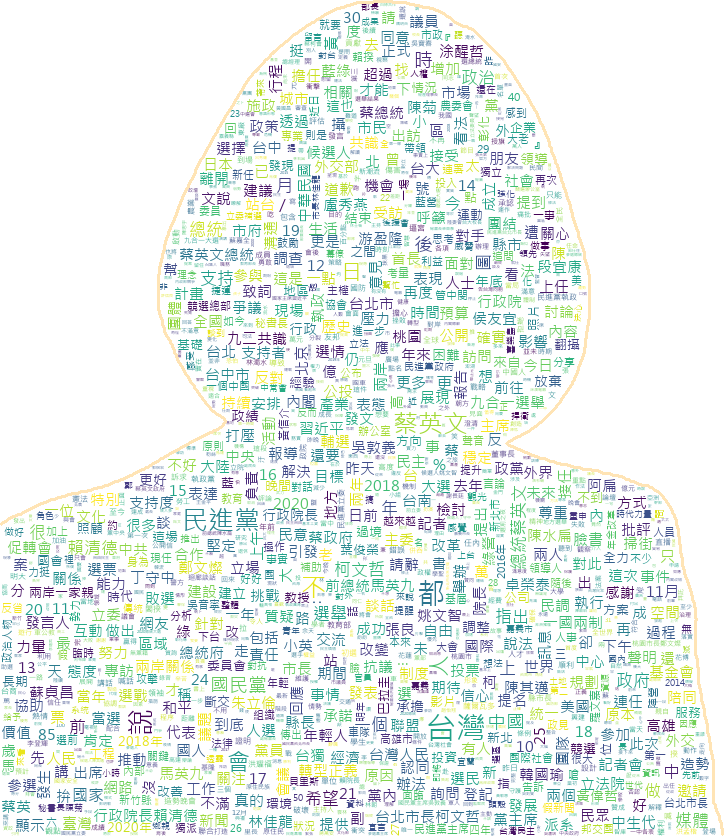

In [51]:
# 蔡英文
ten_wc = get_wordcloud_of_keywords_modify('蔡英文', contents, '../politicians/ten.png')
# ten_wc.to_file('politicians/tenwc.png')
ten_wc.to_image()


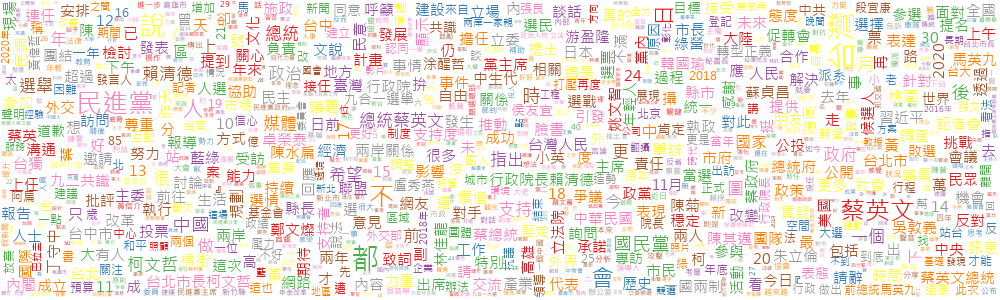

In [47]:
# 沒有照片
ten_wc_2 = get_wordcloud_of_keywords_modify('蔡英文', contents)
ten_wc_2.to_image()